In [1]:
#Call in my packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from Starclass import Star
import ClosePlots as cp

import glob
from tqdm import tqdm
import sys
import os

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
#Import useful data
sfile = glob.glob('../../data/Elsworth+/Elsworth_x_TGAS*')[0]
columns = ['KIC','astero_parallax','astero_parallax_err','GLAT','GLON','_RA','_DE','kic_kmag']
df = pd.read_csv(sfile, usecols=columns)

In [15]:
#Kill data where parallax error > 30% of the parallax value
print(len(df))
df = df[df.astero_parallax_err <= .3*df.astero_parallax].reset_index()
print(len(df))

886
886


In [17]:
#Build a sample of 100 or so stars to test functionality in current build
length = len(df)
#First we're going to use galactic coordinates
M_gal = np.zeros(length)
M_gal_err = np.zeros(length)
for idx in tqdm(range(length)):
    S = Star(str(df.KIC[idx])) #Call class
    S.pass_parallax(df.astero_parallax[idx], err=df.astero_parallax_err[idx])
    S.pass_position(df.GLON[idx], df.GLAT[idx], frame='galactic')
    S.pass_magnitude(df.kic_kmag[idx],err=None, band='Ks')
    M_gal[idx], M_gal_err[idx] = S.get_M()

100%|██████████| 886/886 [03:16<00:00,  4.50it/s]


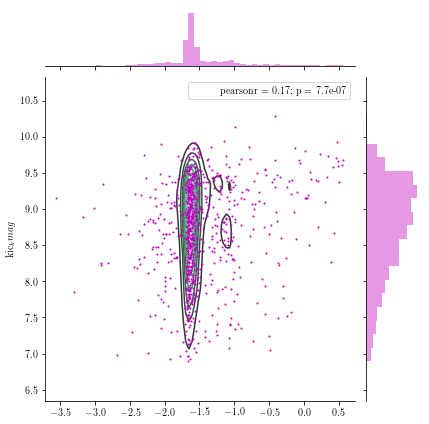

In [18]:
#Build a distplot
g=sns.jointplot(M_gal, df.kic_kmag[:length],color="m",s=1)
g.plot_joint(sns.kdeplot, zorder=0, nlevels=10)

Text(0,0.5,u'm$_{Ks}$')

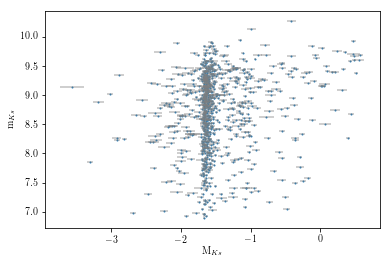

In [24]:
#Plot a m - M plot with errorbars
fig, ax = plt.subplots()
ax.scatter(M_gal, df.kic_kmag[:length],s=1)
ax.errorbar(M_gal, df.kic_kmag[:length], xerr=M_gal_err,alpha=.5,fmt=None,c='grey')
ax.set_xlabel(r'M$_{Ks}$')
ax.set_ylabel(r'm$_{Ks}$')

Text(0,0.5,u'$m_{Ks}$')

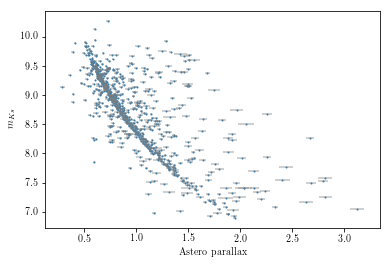

In [25]:
#Plot the Davies+17 Ks - parallax plot
fig, ax = plt.subplots()
ax.scatter(df.astero_parallax, df.kic_kmag, s=1)
ax.errorbar(df.astero_parallax,df.kic_kmag, xerr=df.astero_parallax_err, alpha=.5, fmt=None, c='grey')
ax.set_xlabel('Astero parallax')
ax.set_ylabel(r'$m_{Ks}$')

In [22]:
#Kill the code. Code graveyard below
sys.exit()

SystemExit: 

In [ ]:
#Now lets do the same again but for RA and DEC
M_icrs = np.zeros(length)
M_icrs_err = np.zeros(length)
for idx in tqdm(range(length)):
    S = Star(str(df.KIC[idx])) #Call class
    S.pass_parallax(df.parallax[idx], err=df.parallax_error[idx])
    S.pass_position(df._RA[idx], df._DE[idx], frame='icrs')
    S.pass_magnitude(df.kic_kmag[idx],err=None, band='Ks')
    M_icrs[idx], M_icrs_err[idx] = S.get_M()    

In [ ]:
#Perfect match
#Lets compare these two first before doing the distplot
fig, (ax, axr) = plt.subplots(2)
ax.scatter(M_gal, M_icrs, s=3, zorder=1000)
ax.errorbar(M_gal, M_icrs, xerr = M_gal_err, c='grey',yerr = M_icrs_err, alpha=.3, fmt='o', zorder=999)
ax.plot(M_gal, M_gal, c='r', alpha=.7, linestyle='--',zorder=1001)
ax.set_ylabel('M (icrs coords)')
ax.set_xlabel('M (galactic coords)')

axr.scatter(M_gal, M_gal - M_icrs, s=3, zorder=1000)
axr.errorbar(M_gal, M_gal - M_icrs, c='grey', alpha=.3, fmt='o',
            yerr = np.sqrt(M_gal_err**2 + M_icrs_err**2), zorder=999)
axr.set_ylabel('M (galactic) - M (icrs)')
axr.set_xlabel('M (galactic)')
axr.axhline(0., c='r', linestyle='--', alpha=.7)

axr.grid()
ax.grid()
fig.tight_layout()